In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sqlite3
import json
import requests
import time
from bs4 import BeautifulSoup
import re
from numpy.random import normal
from scipy.stats import kurtosis, skew
import math
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
df = pd.read_csv('UCI_Credit_Card.csv')

In [2]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [4]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [5]:
df.corr()['default.payment.next.month'].sort_values(ascending=False)

default.payment.next.month    1.000000
PAY_0                         0.324794
PAY_2                         0.263551
PAY_3                         0.235253
PAY_4                         0.216614
PAY_5                         0.204149
PAY_6                         0.186866
EDUCATION                     0.028006
AGE                           0.013890
BILL_AMT6                    -0.005372
BILL_AMT5                    -0.006760
BILL_AMT4                    -0.010156
ID                           -0.013952
BILL_AMT3                    -0.014076
BILL_AMT2                    -0.014193
BILL_AMT1                    -0.019644
MARRIAGE                     -0.024339
SEX                          -0.039961
PAY_AMT6                     -0.053183
PAY_AMT5                     -0.055124
PAY_AMT3                     -0.056250
PAY_AMT4                     -0.056827
PAY_AMT2                     -0.058579
PAY_AMT1                     -0.072929
LIMIT_BAL                    -0.153520
Name: default.payment.nex

We can only see weak correlations between default.payment.next.month and the independent variables so far.

In [6]:
df_pairs = df.corr().abs().stack().reset_index().sort_values(0, ascending=False)
df_pairs['Pairs'] = list(zip(df_pairs.level_0, df_pairs.level_1))
df_pairs.set_index(['Pairs'], inplace = True)
df_pairs.drop(columns=['level_1', 'level_0'], inplace = True)
df_pairs.columns = ['Correlation']
df_pairs.drop_duplicates(inplace=True)
df_pairs[(df_pairs.Correlation>.75) & (df_pairs.Correlation<1)]

,Correlation
Pairs,
"(BILL_AMT1, BILL_AMT2)",0.951484
"(BILL_AMT5, BILL_AMT6)",0.946197
"(BILL_AMT5, BILL_AMT4)",0.940134
"(BILL_AMT3, BILL_AMT2)",0.928326
"(BILL_AMT4, BILL_AMT3)",0.923969
"(BILL_AMT6, BILL_AMT4)",0.900941
"(BILL_AMT2, BILL_AMT4)",0.892482
"(BILL_AMT1, BILL_AMT3)",0.892279
"(BILL_AMT3, BILL_AMT5)",0.883910


There are strong correlations elsewhere, suggesting there are many multicollinearity issues.

In [7]:
df.rename(columns={'default.payment.next.month': 'default_payment_next_month'},inplace=True)

In [8]:
df.drop(columns=['ID'], inplace = True)

In [9]:
outcome='default_payment_next_month'
cols=[col for col in df.columns]
cols.remove('default_payment_next_month')
predictors='+'.join(cols)
formula=outcome+'~'+predictors
model=ols(formula=formula,data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                                
======================================================================================
Dep. Variable:     default_payment_next_month   R-squared:                       0.124
Model:                                    OLS   Adj. R-squared:                  0.123
Method:                         Least Squares   F-statistic:                     184.5
Date:                        Tue, 15 Dec 2020   Prob (F-statistic):               0.00
Time:                                14:44:39   Log-Likelihood:                -14202.
No. Observations:                       30000   AIC:                         2.845e+04
Df Residuals:                           29976   BIC:                         2.865e+04
Df Model:                                  23                                         
Covariance Type:                    nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3142      0.018     17.541      0.000       0.279       0.349
LIMIT_BAL  -9.053e-08   2.16e-08     -4.193      0.000   -1.33e-07   -4.82e-08
SEX           -0.0145      0.005     -3.130      0.002      -0.024      -0.005
EDUCATION     -0.0151      0.003     -5.022      0.000      -0.021      -0.009
MARRIAGE      -0.0238      0.005     -4.996      0.000      -0.033      -0.014
AGE            0.0014      0.000      5.128      0.000       0.001       0.002
PAY_0          0.0957      0.003     34.596      0.000       0.090       0.101
PAY_2          0.0195      0.003      5.828      0.000       0.013       0.026
PAY_3          0.0117      0.004      3.256      0.001       0.005       0.019
PAY_4          0.0034      0.004      0.846      0.398      -0.004       0.011
PAY_5          0.0057      0.004      1.324      0.185      -0.003       0.014
PAY_6          0.0008      0.004      0.225      0.822      -0.006       0.008
BILL_AMT1  -6.225e-07   1.14e-07     -5.453      0.000   -8.46e-07   -3.99e-07
BILL_AMT2   1.587e-07    1.6e-07      0.990      0.322   -1.56e-07    4.73e-07
BILL_AMT3   3.005e-08   1.51e-07      0.199      0.842   -2.66e-07    3.26e-07
BILL_AMT4  -6.793e-08   1.57e-07     -0.432      0.666   -3.76e-07     2.4e-07
BILL_AMT5  -2.049e-08   1.85e-07     -0.111      0.912   -3.82e-07    3.41e-07
BILL_AMT6   1.153e-07   1.46e-07      0.789      0.430   -1.71e-07    4.02e-07
PAY_AMT1   -7.437e-07   1.77e-07     -4.201      0.000   -1.09e-06   -3.97e-07
PAY_AMT2   -2.092e-07   1.46e-07     -1.436      0.151   -4.95e-07    7.63e-08
PAY_AMT3   -2.874e-08   1.69e-07     -0.170      0.865    -3.6e-07    3.02e-07
PAY_AMT4   -2.521e-07   1.84e-07     -1.371      0.170   -6.13e-07    1.08e-07
PAY_AMT5    -3.41e-07   1.91e-07     -1.787      0.074   -7.15e-07     3.3e-08
PAY_AMT6    -9.77e-08   1.37e-07     -0.716      0.474   -3.65e-07     1.7e-07
==============================================================================
Omnibus:                     4682.286   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7285.821
Skew:                           1.204   Prob(JB):                         0.00
Kurtosis:                       3.178   Cond. No.                     2.10e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.1e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

A linear regression will not work, since the only possibilities for the target variable are true (1) and false (0).

In [10]:
df['default_payment_next_month'].value_counts()

0    23364
1     6636
Name: default_payment_next_month, dtype: int64

In 23,364 out of 30,000 (~78%) cases, there is not a default payment next month.
If we randomly guess that all of them are negative, we will be accurate about 78% of the time, but that would be a very suboptimal model.

In [11]:
# Create dummy variables
relevant_columns = ['SEX','EDUCATION','MARRIAGE','default_payment_next_month','AGE','PAY_0','BILL_AMT1','PAY_AMT1','LIMIT_BAL']
dummy_dataframe = pd.get_dummies(df[relevant_columns], drop_first=True, dtype=float)

dummy_dataframe.shape

(30000, 9)

In [12]:
# Drop missing rows
dummy_dataframe = dummy_dataframe.dropna()
dummy_dataframe.shape

(30000, 9)

In [13]:
# Split the data into X and y
y = dummy_dataframe['default_payment_next_month']
X = dummy_dataframe.drop(columns=['default_payment_next_month'], axis=1)

In [14]:
# Build a logistic regression model using statsmodels
import statsmodels.api as sm
X = sm.tools.add_constant(X)
logit_model = sm.Logit(y, X)
result = logit_model.fit()

Optimization terminated successfully.
         Current function value: 0.468806
         Iterations 7


In [15]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               Logit Regression Results                               
======================================================================================
Dep. Variable:     default_payment_next_month   No. Observations:                30000
Model:                                  Logit   Df Residuals:                    29991
Method:                                   MLE   Df Model:                            8
Date:                        Tue, 15 Dec 2020   Pseudo R-squ.:                  0.1128
Time:                                14:44:40   Log-Likelihood:                -14064.
converged:                               True   LL-Null:                       -15853.
Covariance Type:                    nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.6625      0.118     -5.629      0.000      -0.893      -0.432
SEX           -0.1186      0.030     -3.891      0.000      -0.178      -0.059
EDUCATION     -0.0971      0.021     -4.696      0.000      -0.138      -0.057
MARRIAGE      -0.1625      0.032     -5.157      0.000      -0.224      -0.101
AGE            0.0071      0.002      3.997      0.000       0.004       0.011
PAY_0          0.6994      0.015     47.038      0.000       0.670       0.729
BILL_AMT1  -1.227e-06   2.47e-07     -4.962      0.000   -1.71e-06   -7.42e-07
PAY_AMT1   -1.314e-05   2.03e-06     -6.457      0.000   -1.71e-05   -9.15e-06
LIMIT_BAL  -1.568e-06   1.46e-07    -10.712      0.000   -1.86e-06   -1.28e-06
==============================================================================
"""

In [16]:
dummy_dataframe.head(10)

,SEX,EDUCATION,MARRIAGE,default_payment_next_month,AGE,PAY_0,BILL_AMT1,PAY_AMT1,LIMIT_BAL
0,2,2,1,1,24,2,3913.0,0.0,20000.0
1,2,2,2,1,26,-1,2682.0,0.0,120000.0
2,2,2,2,0,34,0,29239.0,1518.0,90000.0
3,2,2,1,0,37,0,46990.0,2000.0,50000.0
4,1,2,1,0,57,-1,8617.0,2000.0,50000.0
5,1,1,2,0,37,0,64400.0,2500.0,50000.0
6,1,1,2,0,29,0,367965.0,55000.0,500000.0
7,2,2,2,0,23,0,11876.0,380.0,100000.0
8,2,3,1,0,28,0,11285.0,3329.0,140000.0
9,1,3,2,0,35,-2,0.0,0.0,20000.0


AUC: 0.6241835808539503


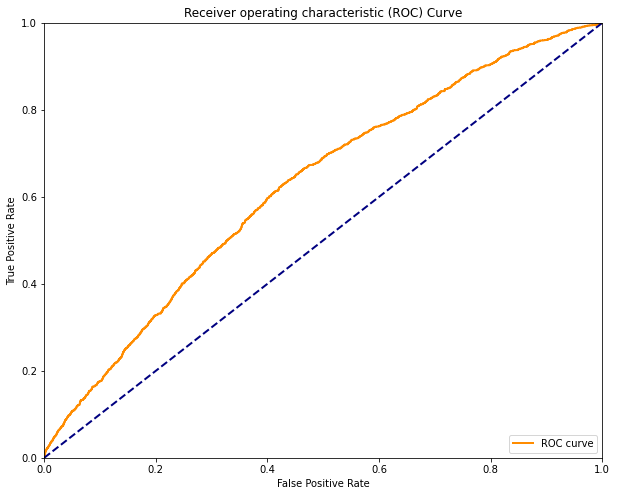

In [17]:
import itertools
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc

logreg = LogisticRegression(fit_intercept=False, solver='liblinear')

# Split the data into a training and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
# Probability scores for test set
y_score = logreg.fit(X_train, y_train).decision_function(X_test)
# False positive rate and true positive rate
fpr, tpr, thresholds = roc_curve(y_test, y_score)


# Print AUC
print('AUC: {}'.format(auc(fpr, tpr)))

# Plot the ROC curve
plt.figure(figsize=(10, 8))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0, 1])
plt.ylim([0, 1])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [18]:
# Previous original class distribution
print(y_train.value_counts()) 

0    17496
1     5004
Name: default_payment_next_month, dtype: int64


In [19]:
#The genders are set to male=1 and female=2. By changing 2's to 0's, we set up a true/false, or 1/0 outcome.
dummy_dataframe['SEX'] = dummy_dataframe['SEX'].replace([2],0)

In [20]:
dummy_dataframe['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

In [21]:
#The education levels are set to graduate school=1, university=2, high school=3,
#other=4, unknown=5/6. We would like 1's to indicate at least a university education and
#0's to indicate less than a university education.
dummy_dataframe['EDUCATION'] = dummy_dataframe['EDUCATION'].replace([2],1)
dummy_dataframe['EDUCATION'] = dummy_dataframe['EDUCATION'].replace([3],0)
dummy_dataframe['EDUCATION'] = dummy_dataframe['EDUCATION'].replace([4],0)
dummy_dataframe['EDUCATION'] = dummy_dataframe['EDUCATION'].replace([5],0)
dummy_dataframe['EDUCATION'] = dummy_dataframe['EDUCATION'].replace([6],0)

In [22]:
dummy_dataframe['MARRIAGE'].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

In [23]:
#The marriage categories are set to 1=married, 2=single, 3=other.
#We would like 1's to indicate married and 0's to indicate not married.
dummy_dataframe['MARRIAGE'] = dummy_dataframe['MARRIAGE'].replace([2],0)
dummy_dataframe['MARRIAGE'] = dummy_dataframe['MARRIAGE'].replace([3],0)

In [24]:
dummy_dataframe['PAY_0'].value_counts()

 0    14737
-1     5686
 1     3688
-2     2759
 2     2667
 3      322
 4       76
 5       26
 8       19
 6       11
 7        9
Name: PAY_0, dtype: int64

In [25]:
#0 and -1 PAY_0 mean that the payment was made on time. We want on-time payments to have a 1 PAY_0,
#and all remaining PAY_0 values should be converted to 0.
dummy_dataframe['PAY_0'] = dummy_dataframe['PAY_0'].replace([1],3)

In [26]:
dummy_dataframe['PAY_0'] = dummy_dataframe['PAY_0'].replace([0],1)

In [27]:
dummy_dataframe.describe()

,SEX,EDUCATION,MARRIAGE,default_payment_next_month,AGE,PAY_0,BILL_AMT1,PAY_AMT1,LIMIT_BAL
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,0.396267,0.820500,0.455300,0.221200,35.485500,0.720400,51223.330900,5663.580500,167484.322667
std,0.489129,0.383777,0.498006,0.415062,9.217904,1.489619,73635.860576,16563.280354,129747.661567
min,0.000000,0.000000,0.000000,0.000000,21.000000,-2.000000,-165580.000000,0.000000,10000.000000
25%,0.000000,1.000000,0.000000,0.000000,28.000000,-1.000000,3558.750000,1000.000000,50000.000000
50%,0.000000,1.000000,0.000000,0.000000,34.000000,1.000000,22381.500000,2100.000000,140000.000000
75%,1.000000,1.000000,1.000000,0.000000,41.000000,1.000000,67091.000000,5006.000000,240000.000000
max,1.000000,1.000000,1.000000,1.000000,79.000000,8.000000,964511.000000,873552.000000,1000000.000000


In [28]:
dummy_dataframe['PAY_0'] = dummy_dataframe['PAY_0'].replace([-1],1)
dummy_dataframe['PAY_0'] = dummy_dataframe['PAY_0'].replace([2],0)
dummy_dataframe['PAY_0'] = dummy_dataframe['PAY_0'].replace([3],0)
dummy_dataframe['PAY_0'] = dummy_dataframe['PAY_0'].replace([4],0)
dummy_dataframe['PAY_0'] = dummy_dataframe['PAY_0'].replace([5],0)
dummy_dataframe['PAY_0'] = dummy_dataframe['PAY_0'].replace([6],0)
dummy_dataframe['PAY_0'] = dummy_dataframe['PAY_0'].replace([7],0)
dummy_dataframe['PAY_0'] = dummy_dataframe['PAY_0'].replace([8],0)
dummy_dataframe['PAY_0'] = dummy_dataframe['PAY_0'].replace([9],0)
dummy_dataframe['PAY_0'] = dummy_dataframe['PAY_0'].replace([-2],0)

In [29]:
import statsmodels.api as sm
X = sm.tools.add_constant(X)
logit_model = sm.Logit(y, X)
result = logit_model.fit()

Optimization terminated successfully.
         Current function value: 0.468806
         Iterations 7


In [30]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               Logit Regression Results                               
======================================================================================
Dep. Variable:     default_payment_next_month   No. Observations:                30000
Model:                                  Logit   Df Residuals:                    29991
Method:                                   MLE   Df Model:                            8
Date:                        Tue, 15 Dec 2020   Pseudo R-squ.:                  0.1128
Time:                                14:44:42   Log-Likelihood:                -14064.
converged:                               True   LL-Null:                       -15853.
Covariance Type:                    nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.6625      0.118     -5.629      0.000      -0.893      -0.432
SEX           -0.1186      0.030     -3.891      0.000      -0.178      -0.059
EDUCATION     -0.0971      0.021     -4.696      0.000      -0.138      -0.057
MARRIAGE      -0.1625      0.032     -5.157      0.000      -0.224      -0.101
AGE            0.0071      0.002      3.997      0.000       0.004       0.011
PAY_0          0.6994      0.015     47.038      0.000       0.670       0.729
BILL_AMT1  -1.227e-06   2.47e-07     -4.962      0.000   -1.71e-06   -7.42e-07
PAY_AMT1   -1.314e-05   2.03e-06     -6.457      0.000   -1.71e-05   -9.15e-06
LIMIT_BAL  -1.568e-06   1.46e-07    -10.712      0.000   -1.86e-06   -1.28e-06
==============================================================================
"""

In [31]:
#So far, our model tells us the following:
#Male=less likely to default
#At least a college degree=less likely to default
#Married=less likely to default
#Older=more likely to default
#Recent payment made on time=more likely to default? This does not make sense.
#Higher bill amount=less likely to default
#Higher pay amount=less likely to default
#Higher limit balance=less likely to default

In [32]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Split data into X and y
y = dummy_dataframe['default_payment_next_month']
X = dummy_dataframe.drop(columns=['default_payment_next_month'], axis=1)

# Split the data into a training and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [33]:
# Import LogisticRegression
from sklearn.linear_model import LogisticRegression

# Instantiate LogisticRegression 
logreg = LogisticRegression(fit_intercept=False, C=1e12, solver='liblinear')

# Fit to training data
model_log = logreg.fit(X_train, y_train)
model_log

LogisticRegression(C=1000000000000.0, fit_intercept=False, solver='liblinear')

In [34]:
#Accuracy calculation function
def accuracy(y, y_hat):
    y_y_hat = list(zip(y, y_hat))
    tp = sum([1 for i in y_y_hat if i[0] == 1 and i[1] == 1])
    tn = sum([1 for i in y_y_hat if i[0] == 0 and i[1] == 0])
    return (tp + tn) / float(len(y_hat))

In [35]:
#Recall calculation function
def recall(y, y_hat):
    y_y_hat = list(zip(y, y_hat))
    tp = sum([1 for i in y_y_hat if i[0] == 1 and i[1] == 1])
    fn = sum([1 for i in y_y_hat if i[0] == 1 and i[1] == 0])
    return tp / (tp + fn)

In [36]:
def precision(y, y_hat):
    y_y_hat = list(zip(y, y_hat))
    tp = sum([1 for i in y_y_hat if i[0] == 1 and i[1] == 1])
    fp = sum([1 for i in y_y_hat if i[0] == 0 and i[1] == 1])
    return tp / float(tp + fp)

In [37]:
#F1 calculation function
def f1(y, y_hat):
    precision_score = precision(y, y_hat)
    recall_score = recall(y, y_hat)
    numerator = precision_score * recall_score
    denominator = precision_score + recall_score
    return 2 * (numerator / denominator)

In [38]:
y_hat_train = logreg.predict(X_train)
y_hat_test = logreg.predict(X_test)

print('Training Accuracy: ', accuracy(y_train, y_hat_train))
print('Testing Accuracy: ', accuracy(y_test, y_hat_test))

Training Accuracy:  0.7776
Testing Accuracy:  0.7824


In [39]:
print('Training Recall: ', recall(y_train, y_hat_train))
print('Testing Recall: ', recall(y_test, y_hat_test))

Training Recall:  0.0
Testing Recall:  0.0


In [40]:
#print('Training Precision: ', precision(y_train, y_hat_train))
#print('Testing Precision: ', precision(y_test, y_hat_test))
#print('\n\n')

#Not working because ZeroDivisionError: float division by zero

In [41]:
#print('Training F1-Score: ', f1(y_train, y_hat_train))
#print('Testing F1-Score: ', f1(y_test, y_hat_test))

#F1 calculation is not working because ZeroDivisionError: float division by zero

In [42]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

print('Training Accuracy: ', accuracy_score(y_train, y_hat_train))
print('Testing Accuracy: ', accuracy_score(y_test, y_hat_test))
print('\n\n')

print('Training Recall: ', recall_score(y_train, y_hat_train))
print('Testing Recall: ', recall_score(y_test, y_hat_test))
print('\n\n')

print('Training Precision: ', precision_score(y_train, y_hat_train))
print('Testing Precision: ', precision_score(y_test, y_hat_test))
print('\n\n')

print('Training F1-Score: ', f1_score(y_train, y_hat_train))
print('Testing F1-Score: ', f1_score(y_test, y_hat_test))

Training Accuracy:  0.7776
Testing Accuracy:  0.7824



Training Recall:  0.0
Testing Recall:  0.0



Training Precision:  0.0
Testing Precision:  0.0



Training F1-Score:  0.0
Testing F1-Score:  0.0


In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Define appropriate X and y
X = dummy_dataframe[dummy_dataframe.columns[:-1]]
y = dummy_dataframe.default_payment_next_month

# Normalize the data
for col in dummy_dataframe.columns:
    dummy_dataframe[col] = (dummy_dataframe[col] - min(dummy_dataframe[col]))/ (max(dummy_dataframe[col]) - min(dummy_dataframe[col]))

# Split the data into train and test sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Fit a model
logreg = LogisticRegression(fit_intercept=False, C=1e12, solver='liblinear')
model_log = logreg.fit(X_train, y_train)

# Preview model params
print(model_log) 

# Predict
y_hat_test = logreg.predict(X_test)

print("")
# Data preview
dummy_dataframe.head()

LogisticRegression(C=1000000000000.0, fit_intercept=False, solver='liblinear')



,SEX,EDUCATION,MARRIAGE,default_payment_next_month,AGE,PAY_0,BILL_AMT1,PAY_AMT1,LIMIT_BAL
0,0.0,1.0,1.0,1.0,0.051724,0.0,0.149982,0.000000,0.010101
1,0.0,1.0,0.0,1.0,0.086207,1.0,0.148892,0.000000,0.111111
2,0.0,1.0,0.0,0.0,0.224138,1.0,0.172392,0.001738,0.080808
3,0.0,1.0,1.0,0.0,0.275862,1.0,0.188100,0.002290,0.040404
4,1.0,1.0,1.0,0.0,0.620690,1.0,0.154144,0.002290,0.040404


In [44]:
def conf_matrix(y_true, y_pred):
    cm = {'True Positive': 0, 'True Negative': 0, 'False Positive': 0, 'False Negative': 0}
#iterating through predictions and labels, starting at 0, adding 1 each time it matches.    
    for ind, label in enumerate(y_true):
        pred = y_pred[ind]
        if label == 1:
            if label == pred:
                cm['True Positive'] += 1
            else:
                cm['False Negative'] += 1
        else:
            if label == pred:
                cm['True Negative'] += 1
            else:
                cm['False Positive'] += 1
    return cm

conf_matrix(y_test, y_hat_test)

{'True Positive': 0,
 'True Negative': 5868,
 'False Positive': 0,
 'False Negative': 1632}

In [45]:
from sklearn.metrics import confusion_matrix

# Print confusion matrix
cnf_matrix = confusion_matrix(y_test, y_hat_test)
print('Confusion Matrix:\n', cnf_matrix)

Confusion Matrix:
 [[5868    0]
 [1632    0]]


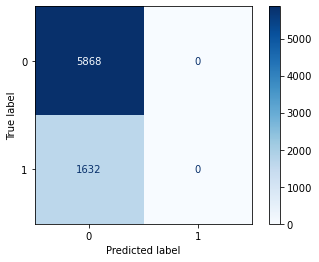

In [46]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(logreg, X_test, y_test,
                     cmap=plt.cm.Blues)
plt.show()

In [47]:
dummy_dataframe.drop(columns=['PAY_AMT1'], inplace = True)

In [48]:
# Import StandardScaler
from sklearn.preprocessing import StandardScaler

# Instantiate StandardScaler
scaler = StandardScaler()

# Transform the training and test sets
scaled_data_train = scaler.fit_transform(X_train)
scaled_data_test = scaler.transform(X_test)

# Convert into a DataFrame
scaled_df_train = pd.DataFrame(scaled_data_train, columns=dummy_dataframe.columns)
scaled_df_train.head()

,SEX,EDUCATION,MARRIAGE,default_payment_next_month,AGE,PAY_0,BILL_AMT1,LIMIT_BAL
0,-0.816497,0.466898,-0.911867,-0.534797,-0.921533,0.684874,-0.333250,-0.219769
1,-0.816497,-2.141795,1.096651,-0.534797,1.911197,0.684874,-0.446067,-0.199202
2,1.224745,-2.141795,1.096651,1.869867,0.276930,-1.460123,0.812221,1.009454
3,-0.816497,0.466898,1.096651,-0.534797,-0.267826,0.684874,-0.543453,0.192410
4,-0.816497,0.466898,1.096651,1.869867,1.911197,-1.460123,2.311821,0.169385


In [49]:
print('Training Accuracy: ', accuracy_score(y_train, y_hat_train))
print('Testing Accuracy: ', accuracy_score(y_test, y_hat_test))
print('\n\n')

print('Training Recall: ', recall_score(y_train, y_hat_train))
print('Testing Recall: ', recall_score(y_test, y_hat_test))
print('\n\n')

print('Training Precision: ', precision_score(y_train, y_hat_train))
print('Testing Precision: ', precision_score(y_test, y_hat_test))
print('\n\n')

print('Training F1-Score: ', f1_score(y_train, y_hat_train))
print('Testing F1-Score: ', f1_score(y_test, y_hat_test))

Training Accuracy:  0.7776
Testing Accuracy:  0.7824



Training Recall:  0.0
Testing Recall:  0.0



Training Precision:  0.0
Testing Precision:  0.0



Training F1-Score:  0.0
Testing F1-Score:  0.0


Even with the scaled data, we are not getting useful information from recall, precision, and F1. This is most likely because we still would need to use SMOTE to deal with the class imbalance.

Note: With regression trees, there is no need to check for multicollinearity or heteroscedasticity.
Also, there is no need to perform scaling. Most of the other algorithms (not just regression trees) besides logistic regressions also do not require multicollinearity/heteroscedasticity checks.

We can improve on these results we get from logistic regression. With the use of SMOTE, we can improve on these results from the logistic regression. For now, though, let's try some other algorithms. Next up in KNN.

In [50]:
raw_df = pd.read_csv('UCI_Credit_Card.csv')

# Print the head of the DataFrame to ensure everything loaded correctly 
raw_df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [51]:
df_knn = raw_df.drop(['ID','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6',
                      'BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6',
                     'PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6'], axis=1, inplace=False)

In [52]:
#The genders are set to male=1 and female=2. By changing 2's to 0's, we set up a true/false, or 1/0 outcome.
df_knn['SEX'] = df_knn['SEX'].replace([2],0)

In [53]:
#The marriage categories are set to 1=married, 2=single, 3=other.
#We would like 1's to indicate married and 0's to indicate not married.
df_knn['MARRIAGE'] = df_knn['MARRIAGE'].replace([2],0)
df_knn['MARRIAGE'] = df_knn['MARRIAGE'].replace([3],0)

In [54]:
#0 and -1 PAY_0 mean that the payment was made on time. We want on-time payments to have a 1 PAY_0,
#and all remaining PAY_0 values should be converted to 0.
df_knn['PAY_0'] = df_knn['PAY_0'].replace([1],3)

In [55]:
df_knn['PAY_0'] = df_knn['PAY_0'].replace([0],1)

In [56]:
df_knn['PAY_0'] = df_knn['PAY_0'].replace([-1],1)
df_knn['PAY_0'] = df_knn['PAY_0'].replace([2],0)
df_knn['PAY_0'] = df_knn['PAY_0'].replace([3],0)
df_knn['PAY_0'] = df_knn['PAY_0'].replace([4],0)
df_knn['PAY_0'] = df_knn['PAY_0'].replace([5],0)
df_knn['PAY_0'] = df_knn['PAY_0'].replace([6],0)
df_knn['PAY_0'] = df_knn['PAY_0'].replace([7],0)
df_knn['PAY_0'] = df_knn['PAY_0'].replace([8],0)
df_knn['PAY_0'] = df_knn['PAY_0'].replace([9],0)
df_knn['PAY_0'] = df_knn['PAY_0'].replace([-2],0)

In [57]:
df_knn.isna().sum()

LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
BILL_AMT1                     0
PAY_AMT1                      0
default.payment.next.month    0
dtype: int64

In [58]:
# One-hot encode the categorical columns
one_hot_knn = pd.get_dummies(df_knn)
one_hot_knn.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,BILL_AMT1,PAY_AMT1,default.payment.next.month
0,20000.0,0,2,1,24,0,3913.0,0.0,1
1,120000.0,0,2,0,26,1,2682.0,0.0,1
2,90000.0,0,2,0,34,1,29239.0,1518.0,0
3,50000.0,0,2,1,37,1,46990.0,2000.0,0
4,50000.0,1,2,1,57,1,8617.0,2000.0,0


In [59]:
labels = one_hot_knn['default.payment.next.month']
one_hot_knn.drop('default.payment.next.month', axis=1, inplace=True)

In [60]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(one_hot_knn, labels, test_size=0.25, random_state=42)

In [61]:
# Import StandardScaler
from sklearn.preprocessing import StandardScaler

# Instantiate StandardScaler
scaler = StandardScaler()

# Transform the training and test sets
scaled_data_train = scaler.fit_transform(X_train)
scaled_data_test = scaler.transform(X_test)

# Convert into a DataFrame
scaled_df_train = pd.DataFrame(scaled_data_train, columns=one_hot_knn.columns)
scaled_df_train.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,BILL_AMT1,PAY_AMT1
0,1.023649,1.242733,1.448714,-0.917933,-0.487699,0.683334,0.411025,-0.096853
1,-1.137989,1.242733,0.186328,-0.917933,-1.245983,0.683334,-0.479349,-0.254771
2,-0.597580,-0.804678,0.186328,-0.917933,-0.054394,0.683334,-0.657743,-0.175195
3,1.023649,-0.804678,0.186328,1.089404,0.487237,-1.463414,-0.694165,-0.331937
4,-0.751982,-0.804678,0.186328,-0.917933,0.053932,0.683334,0.234857,-0.135642


In [62]:
# Import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

# Instantiate KNeighborsClassifier
clf = KNeighborsClassifier()

# Fit the classifier
clf.fit(scaled_data_train, y_train)

# Predict on the test set
test_preds = clf.predict(scaled_data_test)

In [63]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
def print_metrics(labels, preds):
    print("Precision Score: {}".format(precision_score(labels, preds)))
    print("Recall Score: {}".format(recall_score(labels, preds)))
    print("Accuracy Score: {}".format(accuracy_score(labels, preds)))
    print("F1 Score: {}".format(f1_score(labels, preds)))
    
print_metrics(y_test, test_preds)

Precision Score: 0.4598337950138504
Recall Score: 0.3060848186846958
Accuracy Score: 0.7714666666666666
F1 Score: 0.3675276752767528


In [64]:
def find_best_k(X_train, y_train, X_test, y_test, min_k=1, max_k=70):
    best_k = 0
    best_score = 0.0
    for k in range(min_k, max_k+1, 2):
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        preds = knn.predict(X_test)
        f1 = f1_score(y_test, preds)
        if f1 > best_score:
            best_k = k
            best_score = f1
    
    print("Best Value for k: {}".format(best_k))
    print("F1-Score: {}".format(best_score))

In [65]:
find_best_k(scaled_data_train, y_train, scaled_data_test, y_test)

Best Value for k: 55
F1-Score: 0.4234131508931965


We managed to improve F1, which has its optimal value at k=55. Still less than we would like F1 to be, but it is an improvement.

In [66]:
def conf_matrix(y_true, y_pred):
    cm = {'True Positive': 0, 'True Negative': 0, 'False Positive': 0, 'False Negative': 0}
#iterating through predictions and labels, starting at 0, adding 1 each time it matches.    
    for ind, label in enumerate(y_true):
        pred = y_pred[ind]
        if label == 1:
            if label == pred:
                cm['True Positive'] += 1
            else:
                cm['False Negative'] += 1
        else:
            if label == pred:
                cm['True Negative'] += 1
            else:
                cm['False Positive'] += 1
    return cm

conf_matrix(y_test, y_hat_test)

{'True Positive': 0,
 'True Negative': 5873,
 'False Positive': 0,
 'False Negative': 1627}

In [67]:
from sklearn.metrics import confusion_matrix

# Print confusion matrix
cnf_matrix = confusion_matrix(y_test, y_hat_test)
print('Confusion Matrix:\n', cnf_matrix)

Confusion Matrix:
 [[5873    0]
 [1627    0]]


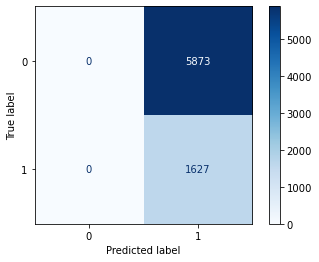

In [68]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(logreg, X_test, y_test,
                     cmap=plt.cm.Blues)
plt.show()

In [69]:
cart_tree=df = pd.read_csv('UCI_Credit_Card.csv')
cart_tree.shape

(30000, 25)

The KNN model is an improvement over the logistic regression, but our metrics still leave a lot to be desired. Next is a tree ensemble attempt.

In [70]:
# Split into training/test sets
X = cart_tree.drop('default.payment.next.month', axis=1)  
y = cart_tree['default.payment.next.month']  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=25)

In [71]:
from sklearn.tree import DecisionTreeRegressor  

regressor = DecisionTreeRegressor(random_state=25)  
regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=25)

In [72]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

y_pred = regressor.predict(X_test) 

print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.2745
Mean Squared Error: 0.2745
Root Mean Squared Error: 0.5239274758971895


In [73]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
tree_ensembles = pd.read_csv('UCI_Credit_Card.csv', index_col=0)

In [74]:
target = tree_ensembles['default.payment.next.month']
tree_ensembles = tree_ensembles.drop('default.payment.next.month', axis=1)

In [75]:
tree_ensembles_dummies = pd.get_dummies('EDUCATION')

In [76]:
data_train, data_test, target_train, target_test = train_test_split(tree_ensembles, target, test_size = 0.25, random_state=123)

In [77]:
tree_clf = DecisionTreeClassifier(criterion='gini', max_depth=5) 
tree_clf.fit(data_train, target_train)

DecisionTreeClassifier(max_depth=5)

In [78]:
tree_clf.feature_importances_

array([0.0074053 , 0.        , 0.00322   , 0.        , 0.01078222,
       0.67973144, 0.14100265, 0.01212656, 0.03403858, 0.        ,
       0.01926009, 0.01875117, 0.        , 0.00369387, 0.00427617,
       0.        , 0.00191355, 0.        , 0.05030846, 0.        ,
       0.01348994, 0.        , 0.        ])

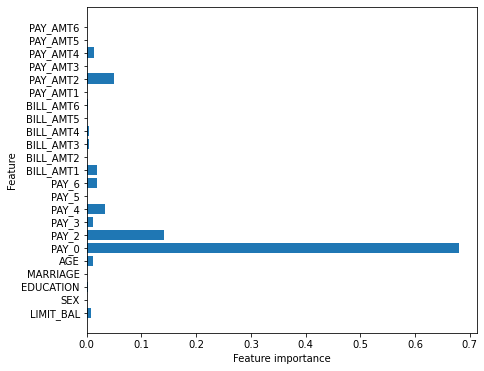

In [79]:
def plot_feature_importances(model):
    n_features = data_train.shape[1]
    plt.figure(figsize=(7,6))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), data_train.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

plot_feature_importances(tree_clf)

It looks like PAY_0 is the most important feature by a wide margin.

In [80]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

pred = tree_clf.predict(data_test)

print(confusion_matrix(target_test, pred))
print(classification_report(target_test, pred))

[[5553  320]
 [1025  602]]
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      5873
           1       0.65      0.37      0.47      1627

    accuracy                           0.82      7500
   macro avg       0.75      0.66      0.68      7500
weighted avg       0.80      0.82      0.80      7500



In [81]:
print("Testing Accuracy for Decision Tree Classifier: {:.4}%".format(accuracy_score(target_test, pred) * 100))

Testing Accuracy for Decision Tree Classifier: 82.07%


This is the highest accuracy we have had so far.

In [82]:
#Instantiating a bagging classifier and then fitting to training data.
bagged_tree =  BaggingClassifier(DecisionTreeClassifier(criterion='gini', max_depth=5), 
                                 n_estimators=20)
bagged_tree.fit(data_train, target_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=5),
                  n_estimators=20)

In [83]:
bagged_tree.score(data_train, target_train)

0.8259555555555556

In [84]:
bagged_tree.score(data_test, target_test)

0.8230666666666666